In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
%matplotlib inline

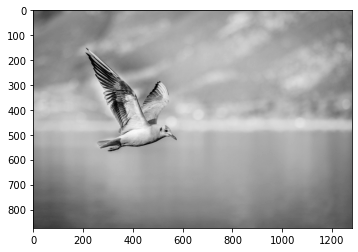

In [22]:
url = "https://courses.openedu.ru/assets/courseware/v1/b9011e32fdcbf88518d7fe143a8fe5e4/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/bird-3158784_1280.jpg"
image = cv2.cvtColor(imutils.url_to_image(url), cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap = "gray")
plt.show()

In [23]:
f = np.fft.fft2(image)
print(f[712, 149])

(1642.6038521194228-16141.448602288372j)


Shift the component corresponding to the zero frequency  to the center and replace all matrix elements by theis absolute values, i.e. magnitudes.

In [24]:
width, heigth = image.shape
center = [int(width/2), int(heigth/2)]
fshift = np.fft.fftshift(f)
print(fshift[center[0]][center[1]] == f[0][0])
print(f'width {width} heigth {heigth}')

True
width 874 heigth 1280


Min 2.9384981004474837
Max 176808943.0


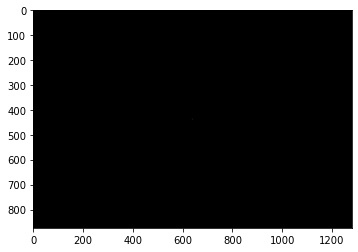

In [25]:
magnitude_spectrum = np.abs(fshift)
plt.imshow(magnitude_spectrum, cmap = 'gray')
print("Min", np.min(magnitude_spectrum))
print("Max", np.max(magnitude_spectrum))

Min 1.3707994578575795
Max 18.99058029512357
Delta 17.619780837265992


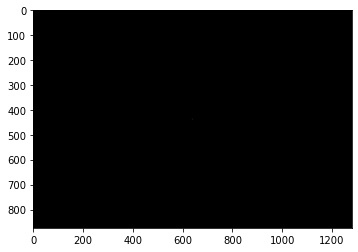

In [26]:
magnitude_spectrum_log = np.log(1+np.abs(fshift))
print("Min", np.min(magnitude_spectrum_log))
print("Max", np.max(magnitude_spectrum_log))
delta = np.max(magnitude_spectrum_log) - np.min(magnitude_spectrum_log) 
print("Delta", delta)
plt.imshow(magnitude_spectrum, cmap = 'gray');

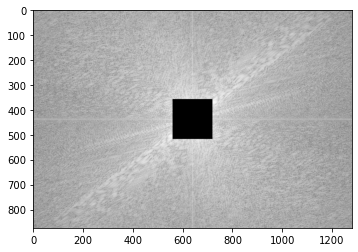

In [27]:
matrix = [80, 80]
fshift[center[0] -  matrix[0] : center[0] + matrix[0], center[1] - matrix[1] : center[1] + matrix[1]] = 0
magnitude_spectrum_log = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum_log, cmap = 'gray');

(-0.8518590969765797+0.10722921174490516j)
0.86


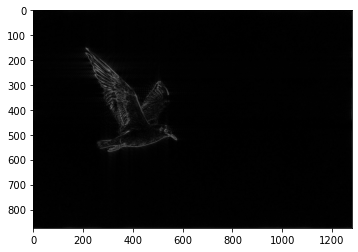

In [28]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
print(img_back[626, 406])
img_back1 = np.abs(img_back)
plt.imshow(img_back1, cmap = 'gray')
print(f'{img_back1[626, 406]:.2f}')

# Task 2

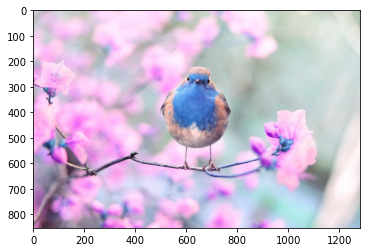

In [14]:
url = 'https://courses.openedu.ru/assets/courseware/v1/e83dc49fda7d62c07c3ea238b8b31d00/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/spring-bird-2295436_1280.jpg'
image = imutils.url_to_image(url)
plt.imshow(image)
plt.show()

Sum of all intensivities 4931955


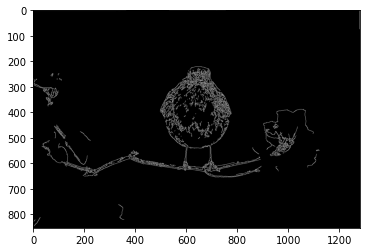

In [16]:
canny = cv2.Canny(image, 100, 200)
plt.imshow(canny, cmap = 'gray');
print("Sum of all intensivities", np.sum(canny))

Sum of all elements 8168805


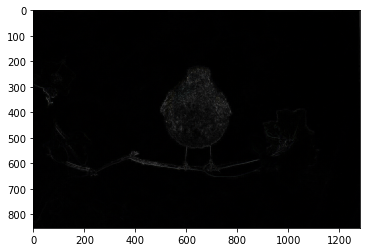

In [4]:
laplacian = cv2.Laplacian(image, -1)
plt.imshow(laplacian,cmap = 'gray');
print("Sum of all elements", np.sum(laplacian))

In [5]:
a = 0
for y in range(laplacian.shape[0]):
    for x in range(laplacian.shape[1]): 
        a+=laplacian[y,x]
print(np.sum(a))

357
